In [1]:
import pandas as pd
import re
import ast

# Load both datasets
cleaned_job_df = pd.read_csv('cleaned_job.csv')
cleaned_resume_df = pd.read_csv('cleaned_resume.csv')

# Function to fix the format of 'bert_features' strings
def fix_list_format(bert_string):
    # Add a comma between floats using regex
    fixed_string = re.sub(r"(?<=\d)\s+(?=-?\d)", ", ", bert_string)
    return fixed_string

# Process the 'bert_features' column in both datasets
for df in [cleaned_job_df, cleaned_resume_df]:
    # Fix formatting
    df['bert_features'] = df['bert_features'].apply(fix_list_format)
    # Convert to Python lists
    df['bert_features'] = df['bert_features'].apply(lambda x: ast.literal_eval(x))

# Verify the results for cleaned_resume_df
print(type(cleaned_resume_df['bert_features'][0]))  # Should be <class 'list'>
print(cleaned_resume_df['bert_features'][0][:5])   # Display first 5 elements of the first list


<class 'list'>
[-0.185356632, 0.384024203, 0.549783826, -0.193681642, 0.278726757]


In [37]:
cleaned_resume_df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [38]:
cleaned_job_df['category'].unique()

array(['Pharmaceutical, Healthcare and Medical Sales',
       'Pharmaceutical Marketing', 'Manufacturing & Operations',
       'Science', 'Clinical Research', 'Regulatory Affairs',
       'Data Management and Statistics',
       'Medical Information and Pharmacovigilance',
       'Medical Affairs / Pharmaceutical Physician', 'Quality-assurance',
       'Pharmacy'], dtype=object)

In [39]:
print(cleaned_job_df.loc[629, "cleaned_description"])
cleaned_job_df.loc[629]

statistical programmer ii im currently working leading cro need experienced sa programmer join team permanent fulltime opportunity based 100 home office depending preference rapid growth year year cro swiftly developed biometrics department outstanding team global professional looking continue expansion would welcome accomplished programmer help create sa sql program investigate data characteristic trend client report data youll also focus using data create tfls whilst performing coordinating implementing complex study demonstrate excellent communication skill liaise team member colleague department even key stakeholder within business may even opportunity interact key client business great opportunity professional career development given world leading training development combined hardworking attitude lead opportunity promotion company pride organic growth creating future leader within success position bsc msc computer science degree relevant sa programming experience relevant experi

job_no                                                            Id-12639
job_description          Statistical Programmer II\r\r\r\nI'm currently...
job_type                                                         Permanent
category                                        Manufacturing & Operations
cleaned_description      statistical programmer ii im currently working...
tokenized_description    ['statistical', 'programmer', 'ii', 'i', 'm', ...
bert_features            [-0.067711249, 0.212578624, 0.540142715, -0.14...
Name: 629, dtype: object

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.spatial.distance import cityblock  # For Manhattan distance

# Assuming `cleaned_job_df` and `cleaned_resume_df` contain 'bert_features' as lists of floats.
# Select the target job's `bert_features`
job_vector = np.array(cleaned_job_df.loc[629, 'bert_features'])  # Example 200

targetedCvs = cleaned_resume_df[cleaned_resume_df['Category'] == 'INFORMATION-TECHNOLOGY']

# Convert resume BERT features into an array
resume_vectors = np.array(targetedCvs['bert_features'].tolist())

# 1. Cosine Similarity
cos_similarities = cosine_similarity([job_vector], resume_vectors)[0]

# 2. Euclidean Distance
euclidean_distances = euclidean_distances([job_vector], resume_vectors)[0]

# 3. Manhattan Distance (L1 Norm)
manhattan_distances = np.array([cityblock(job_vector, vec) for vec in resume_vectors])

# 4. Dot Product
dot_products = np.dot(resume_vectors, job_vector)

# Combine results into a DataFrame
results = pd.DataFrame({
    'Resume_ID': (targetedCvs.index),  # Assuming index represents the unique resume ID
    'Cosine_Similarity': cos_similarities,
    'Euclidean_Distance': euclidean_distances,
    'Manhattan_Distance': manhattan_distances,
    'Dot_Product': dot_products
})

# Sort and get top 10 candidates for each metric
top_10_cosine = results.nlargest(10, 'Cosine_Similarity')
top_10_euclidean = results.nsmallest(10, 'Euclidean_Distance')  # Smaller distance is better
top_10_manhattan = results.nsmallest(10, 'Manhattan_Distance')  # Smaller distance is better
top_10_dot = results.nlargest(10, 'Dot_Product')

In [59]:
# Display the job description
job_index = 629  # Index of the job description you're matching
print("Job Description:")
print(cleaned_job_df.loc[job_index, 'job_description'])  # Replace 'Job_Description' with the actual column name
print("\n" + "="*80 + "\n")

# Function to display top 3 resumes for a given measure
def display_top_resumes(metric_name, top_results_df, resumes_df):
    print(f"Top 3 Resumes Based on {metric_name}:\n")
    
    # Iterate through the rows of the top_results_df to get the top 3 resumes
    for rank, row in top_results_df.iterrows():
        # Retrieve the index of the resume in resumes_df
        resume_index = row.name  # Assuming the index aligns with resumes_df
        
        # Fetch the full resume text using the index
        resume_text = resumes_df.loc[resume_index, 'Resume_str']
        
        # Print details
        print(f"Resume Index: {resume_index}")
        print("Resume Text:")
        print(resume_text)
        
        # Add a separator for better readability
        print("\n" + "-" * 80 + "\n")


Job Description:
Statistical Programmer II
I'm currently working with a leading CRO who need an experienced SAS Programmer to join their team. This is a permanent, fulltime opportunity that can be based 100% at home or in the office depending on your preference.
Because of rapid growth year on year, this CRO has swiftly developed their biometrics department into an outstanding team of global professionals. They are now looking to continue that expansion and would welcome an accomplished programmer to help create SAS and SQL programs to investigate data characteristics and trends for client reports and data.
You'll also focus on using this data to create TFL's, whilst performing, coordinating and implementing these complex studies.
You will have to demonstrate excellent communication skills to liaise with team members, colleagues from other departments, and even key stakeholders within the business. There may even be opportunities to interact with key clients of the business.
There is a

In [64]:
targetedCvs

,ID,Resume_str,Resume_html,Category,cleaned_text,tokenized_text,bert_features
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology summary dedicated infor...,"['information', 'technology', 'summary', 'dedi...","[-0.223646924, 0.330942869, 0.702721357, -0.16..."
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology specialist gs11 experie...,"['information', 'technology', 'specialist', 'g...","[-0.159503996, 0.381707609, 0.737443805, -0.14..."
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology supervisor summary seek...,"['information', 'technology', 'supervisor', 's...","[-0.052719444, 0.377882063, 0.531079292, -0.13..."
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology instructor summary seve...,"['information', 'technology', 'instructor', 's...","[-0.202682883, 0.28791678, 0.545508981, -0.169..."
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology manageranalyst professi...,"['information', 'technology', 'manageranalyst'...","[-0.147001743, 0.294021934, 0.496840239, -0.13..."
...,...,...,...,...,...,...,...
332,27485716,CORPORATE PROJECT MANAGER Caree...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,corporate project manager career overview seas...,"['corporate', 'project', 'manager', 'career', ...","[-0.175599933, 0.390000671, 0.667205691, -0.20..."
333,26480367,IT TECHNOLOGY SPECIALIST Profes...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,technology specialist professional summary ana...,"['technology', 'specialist', 'professional', '...","[-0.102622099, 0.458532751, 0.724713027, -0.18..."
334,81761658,IT MANAGER Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,manager highlights customer client relations a...,"['manager', 'highlights', 'customer', 'client'...","[-0.18067573, 0.335410118, 0.733035564, -0.110..."
335,79541391,SUBJECT MATTER EXPERT (INFORMATION TE...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,subject matter expert information technology a...,"['subject', 'matter', 'expert', 'information',...","[-0.131441146, 0.306738079, 0.656933546, -0.09..."


In [62]:
top_10_cosine

,Resume_ID,Cosine_Similarity,Euclidean_Distance,Manhattan_Distance,Dot_Product
103,320,0.925672,2.988184,65.340772,54.864734
23,240,0.920065,3.086212,68.125667,53.266293
35,252,0.919004,3.134131,68.259011,55.493571
44,261,0.913803,3.216708,70.841734,54.276760
91,308,0.905277,3.415785,73.409386,55.741689
32,249,0.904988,3.410656,73.554778,55.348436
69,286,0.896642,3.559355,76.537454,54.915127
48,265,0.867560,4.169019,87.427888,56.429968
4,221,0.862687,4.281742,88.764353,56.823721
47,264,0.859261,4.135878,88.298250,52.133556


In [96]:
targetedCvs.iloc[35]["Resume_str"]
# display_top_resumes("Cosine Similarity", top_10_cosine.head(3), targetedCvs)

'         INFORMATION TECHNOLOGY (INTERNSHIP)       Summary    MBA graduate specialized at a Business Management of the industries institution which crosses the fields such as healthcare, and IT to compare the optimal practices between the major players. To obtain an analyst position, utilize professional Skill and Knowledge in business. Preferably in business analyst.      Skills     Language: Chinese, English and Japanese  Professional Skills:    Microsoft Office, Excel, Power Point, Word, Outlook, SQL,  Adobe Suit, Flash, Photoshop, Illustrator,\xa0  3D Max\xa0  Others: PHP, Java, C#, Visual Basic, HTML, Cording, Programming, Customer relationship management (CRM) ERP System, RFID, E-Commerce, Electronic Product Code (EPC) Financial Accounting, Human Resources, (HR) Business Marketing, International Trade (Import and Export) App Development SEM, analysis, QMS Statistics, Healthcare.   ?       Experience     July 2014   to   September 2014     Company Name    City  ,   State    Infor

In [97]:
targetedCvs.iloc[35]["tokenized_text"]

"['information', 'technology', 'internship', 'summary', 'mba', 'graduate', 'specialized', 'business', 'management', 'industries', 'institution', 'crosses', 'fields', 'healthcare', 'compare', 'optimal', 'practices', 'major', 'players', 'obtain', 'analyst', 'position', 'utilize', 'professional', 'skill', 'knowledge', 'business', 'preferably', 'business', 'analyst', 'skills', 'language', 'chinese', 'english', 'japanese', 'professional', 'skills', 'microsoft', 'office', 'excel', 'power', 'point', 'word', 'outlook', 'sql', 'adobe', 'suit', 'flash', 'photoshop', 'illustrator', '3d', 'max', 'others', 'php', 'java', 'c', 'visual', 'basic', 'html', 'cording', 'programming', 'customer', 'relationship', 'management', 'crm', 'erp', 'system', 'rfid', 'ecommerce', 'electronic', 'product', 'code', 'epc', 'financial', 'accounting', 'human', 'resources', 'hr', 'business', 'marketing', 'international', 'trade', 'import', 'export', 'app', 'development', 'sem', 'analysis', 'qms', 'statistics', 'healthcare

In [78]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


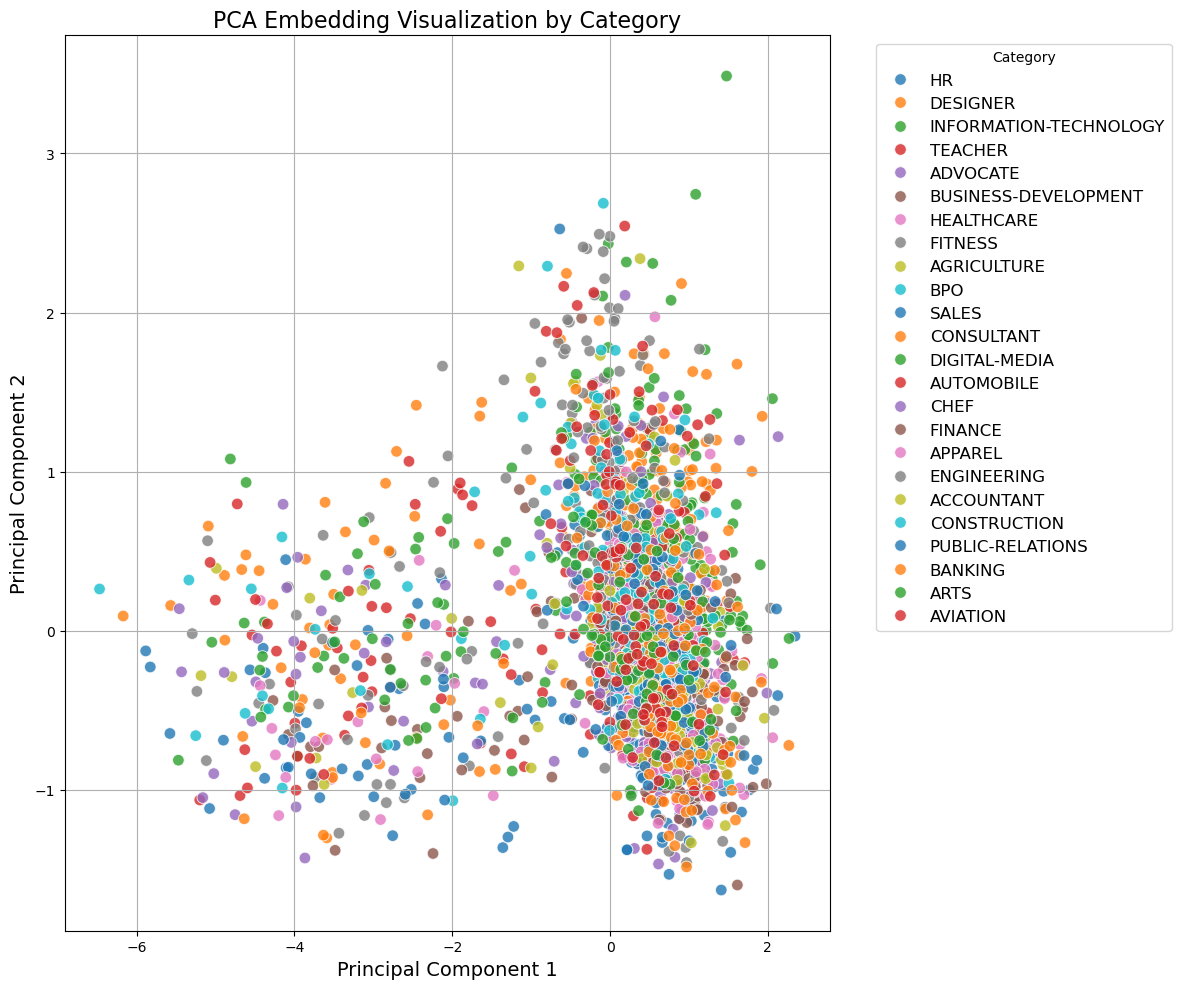

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming `resume_vectors` and `categories` are already defined
resume_vectors = np.array(cleaned_resume_df['bert_features'].tolist())
categories = cleaned_resume_df['Category'].values  # Extract all categories

# Reduce to 2D using PCA
pca_reducer = PCA(n_components=2)
reduced_embeddings_pca = pca_reducer.fit_transform(resume_vectors)

# Create a DataFrame for plotting
embedding_pca_df = pd.DataFrame(reduced_embeddings_pca, columns=['Dim1', 'Dim2'])
embedding_pca_df['Category'] = categories

# Plot PCA results
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='Category', data=embedding_pca_df, palette='tab10', s=70, alpha=0.8
)
plt.title("PCA Embedding Visualization by Category", fontsize=16)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ebouk\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


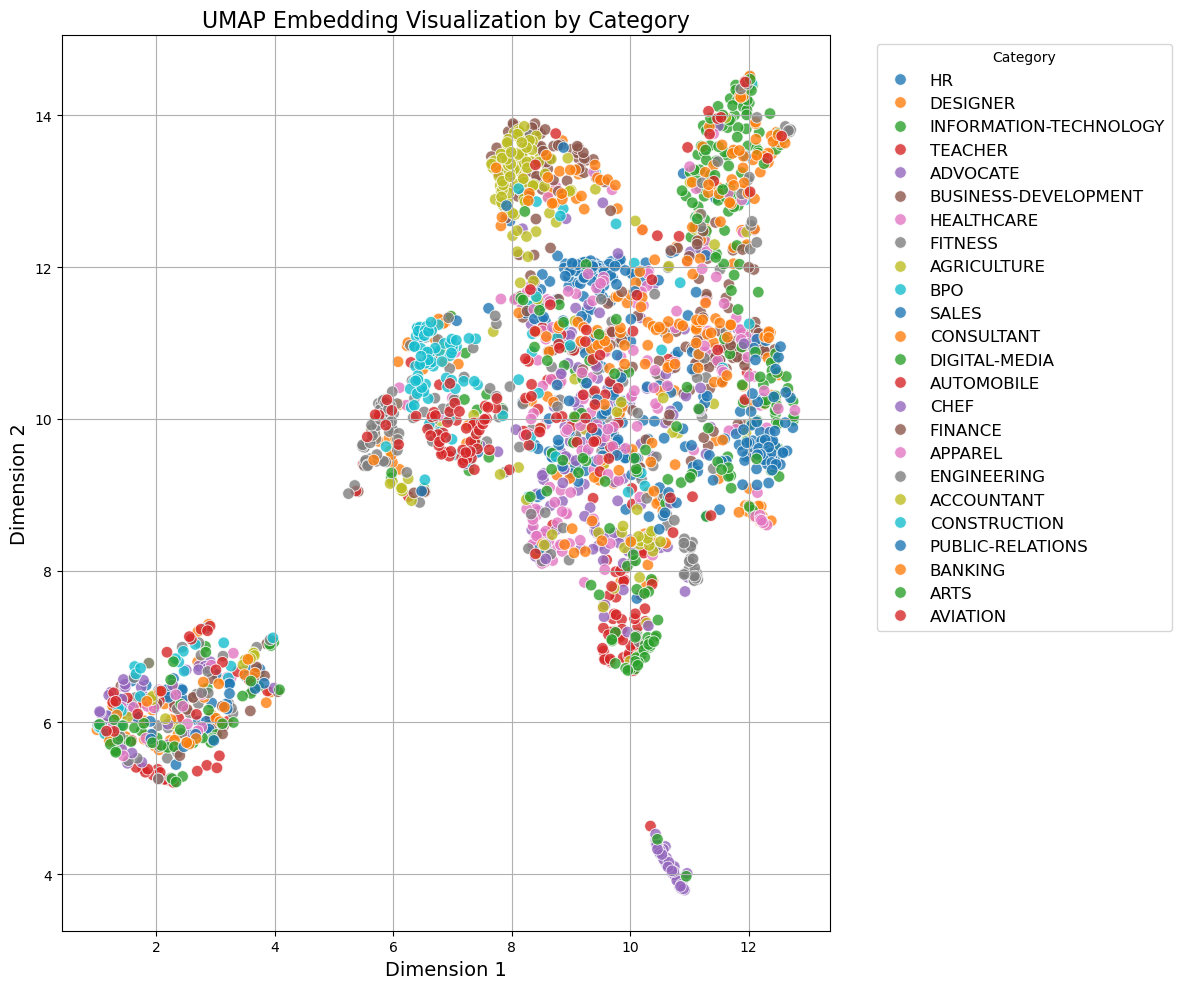

In [86]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure resume_vectors contains the BERT embeddings
resume_vectors = np.array(cleaned_resume_df['bert_features'].tolist())
categories = cleaned_resume_df['Category'].values  # Extract all categories

# Reduce to 2D using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings_umap = reducer.fit_transform(resume_vectors)

# Create a DataFrame for plotting
embedding_df = pd.DataFrame(reduced_embeddings_umap, columns=['Dim1', 'Dim2'])
embedding_df['Category'] = categories  # Add categories to the DataFrame

# Plot the UMAP results
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='Category', data=embedding_df, palette='tab10', s=70, alpha=0.8
)
plt.title("UMAP Embedding Visualization by Category", fontsize=16)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


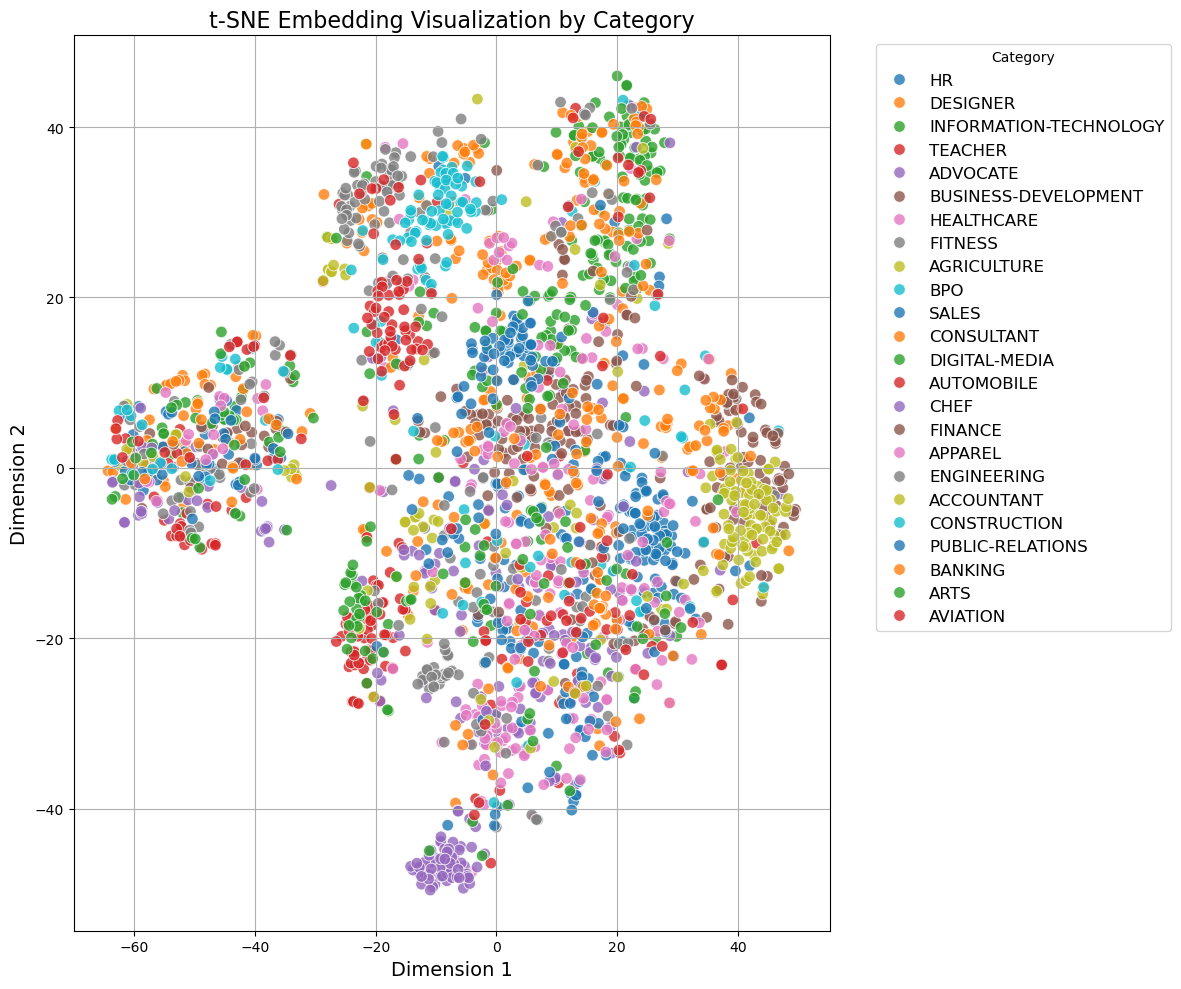

In [85]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure resume_vectors contains the BERT embeddings
resume_vectors = np.array(cleaned_resume_df['bert_features'].tolist())
categories = cleaned_resume_df['Category'].values  # Extract all categories

# Reduce to 2D using t-SNE
reduced_embeddings_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(resume_vectors)

# Create a DataFrame for plotting
import pandas as pd
embedding_df = pd.DataFrame(reduced_embeddings_tsne, columns=['Dim1', 'Dim2'])
embedding_df['Category'] = categories  # Add categories to the DataFrame

# Plot the t-SNE results
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='Category', data=embedding_df, palette='tab10', s=70, alpha=0.8
)
plt.title("t-SNE Embedding Visualization by Category", fontsize=16)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


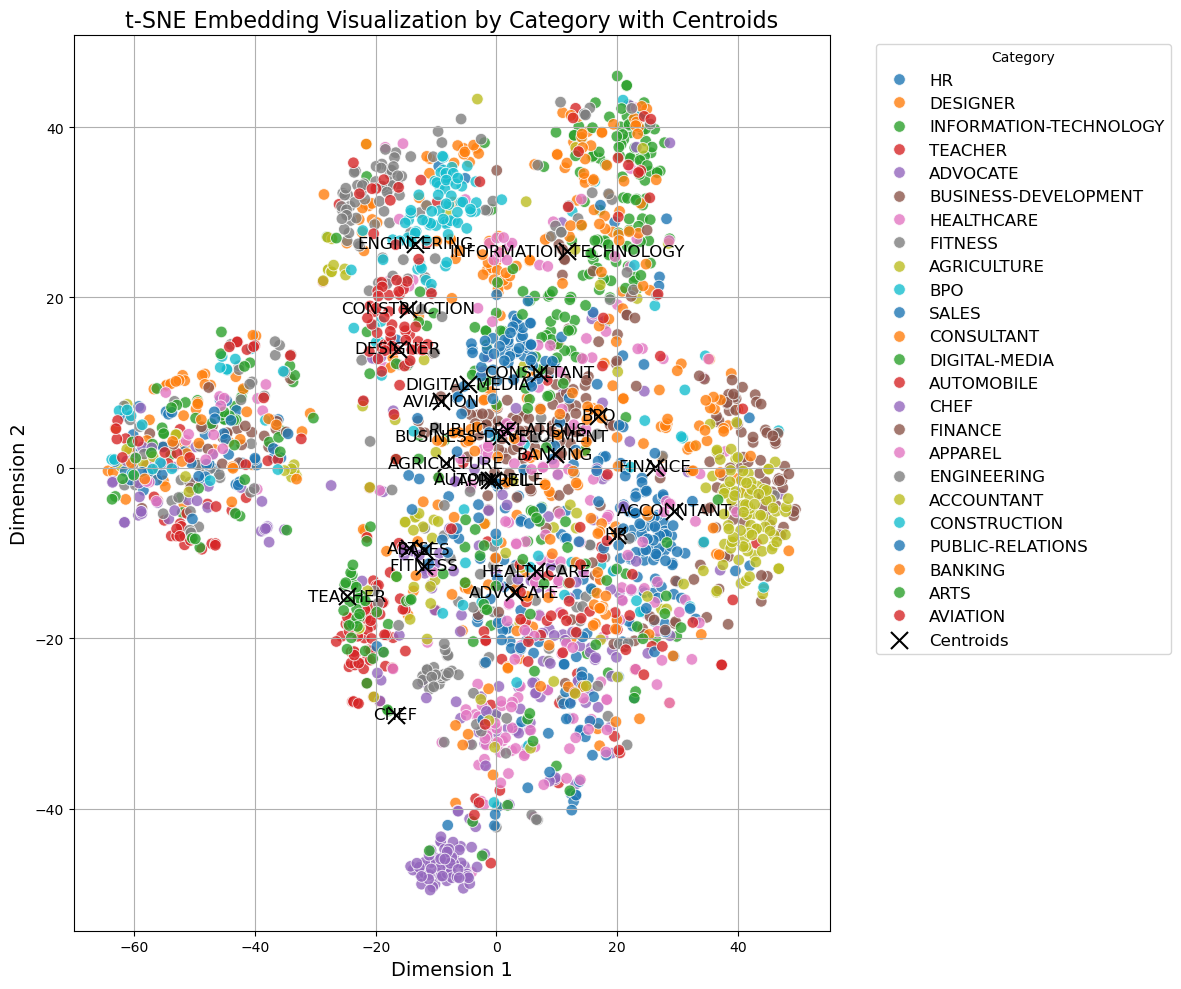

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure resume_vectors contains the BERT embeddings
resume_vectors = np.array(cleaned_resume_df['bert_features'].tolist())
categories = cleaned_resume_df['Category'].values  # Extract all categories

# Reduce to 2D using t-SNE
reduced_embeddings_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(resume_vectors)

# Create a DataFrame for plotting
embedding_df = pd.DataFrame(reduced_embeddings_tsne, columns=['Dim1', 'Dim2'])
embedding_df['Category'] = categories  # Add categories to the DataFrame

# Compute centroids (average points) for each category
centroids = embedding_df.groupby('Category')[['Dim1', 'Dim2']].mean().reset_index()

# Plot the t-SNE results
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='Category', data=embedding_df, palette='tab10', s=70, alpha=0.8
)

# Plot and label the centroids
plt.scatter(centroids['Dim1'], centroids['Dim2'], color='black', s=150, marker='x', label='Centroids')
for _, row in centroids.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Category'], fontsize=12, color='black', ha='center', va='center')

# Add plot details
plt.title("t-SNE Embedding Visualization by Category with Centroids", fontsize=16)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
